In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

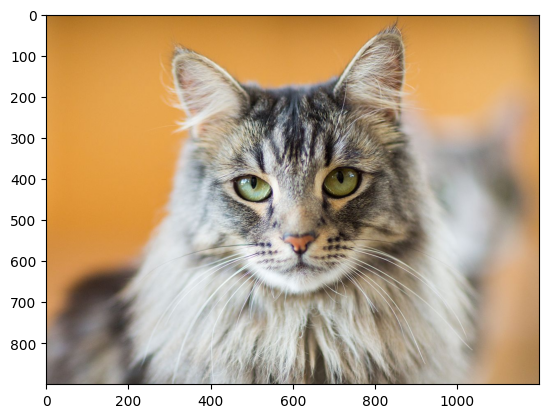

In [3]:
filename = 'cat.jpg'
hsvFilename = 'hsv_' + filename
img = cv2.imread(filename) #BGR
img[:,:,[0,2]] = img[:,:,[2,0]] #BGR -> RGB
plt.imshow(img)

In [4]:
print(img.shape)

(900, 1200, 3)


In [5]:
def RGB_to_HSV(R, G, B):
    V = max(R, G, B)
    m = min(R, G, B)
    C = V - m
    L = V - C/2
    Sv = 0
    Sl = 0
    H = 0
    if C == 0:
        return (H, Sv, V)
    if L != 0 and L != 1:
        Sl = (V - L)/min(L, 1-L)
    elif V == R:
        H = 60*(((G - B)/C) % 6)
    elif V == G:
        H = 60*((B - R)/C + 2)
    elif V == B:
        H = 60*((R - G)/C + 4)
    if V != 0:
        Sv = C/V
    return (H/360, Sv, V)

print(RGB_to_HSV(10, 2, 3))
print(RGB_to_HSV(123, 45, 111))
print(RGB_to_HSV(0, 0, 24))
print(RGB_to_HSV(255, 255, 255))

(0.0, 0.8, 10)
(0.0, 0.6341463414634146, 123)
(0.0, 1.0, 24)
(0, 0, 255)


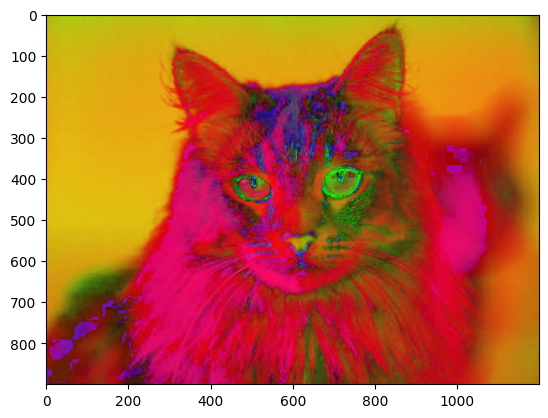

In [6]:
hsv_img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2HSV)[:,:,[2,1,0]]
plt.imshow(hsv_img)

In [9]:
cv2.imwrite(hsvFilename, hsv_img[:,:,[2,1,0]]) # save under BRG format so reverse the bit

True